# Libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/neo-bank-non-sub-churn-prediction/neo_bank_2008.png
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2008.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2020.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/sample_submission.csv
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2019.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/handover_for_next_data_scientist.odt
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2010.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2011.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/fetch_bank_2007.png
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2016.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2017.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2015.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2009.parquet
/kaggle/input/neo-bank-non-sub-churn-prediction/train_2021.parquet
/kaggle/input/neo-bank-non-sub-churn-pred

# Reading Data

In [2]:
file_pattern = '/kaggle/input/neo-bank-non-sub-churn-prediction/train_*.parquet' 
all_files = glob.glob(file_pattern)

In [4]:
df = pd.concat([pd.read_parquet(file) for file in all_files], ignore_index=True)

# Exploratory Data Analysis

In [5]:
print('columns on dataset:')
df.columns

columns on dataset:


Index(['Id', 'customer_id', 'interest_rate', 'name', 'country',
       'date_of_birth', 'address', 'date', 'atm_transfer_in',
       'atm_transfer_out', 'bank_transfer_in', 'bank_transfer_out',
       'crypto_in', 'crypto_out', 'bank_transfer_in_volume',
       'bank_transfer_out_volume', 'crypto_in_volume', 'crypto_out_volume',
       'complaints', 'touchpoints', 'csat_scores', 'tenure', 'from_competitor',
       'job', 'churn_due_to_fraud', 'model_predicted_fraud'],
      dtype='object')

In [6]:
print('years of train dataset:')
list(map(lambda f: int(f[-12:-8]), all_files))

years of train dataset:


[2008,
 2020,
 2019,
 2010,
 2011,
 2016,
 2017,
 2015,
 2009,
 2021,
 2014,
 2022,
 2018,
 2023,
 2012,
 2013]

In [13]:
print('number of customers:')
len(df['customer_id'].unique())

number of customers:


106179

In [26]:
print('customers per countries:')
df.groupby('country')['customer_id'].nunique().sort_values(ascending=False)

customers per countries:


country
Latvia            4383
Czech Republic    4330
Netherlands       4329
Germany           4329
Denmark           4323
Sweden            4314
Greece            4313
Finland           4308
Switzerland       4289
USA               4272
Ireland           4252
Spain             4249
Norway            4245
Slovakia          4239
Poland            4229
Austria           4225
Belgium           4221
Romania           4221
Lithuania         4203
Bulgaria          4193
France            4160
Italy             4159
Estonia           4155
Hungary           4150
Portugal          4088
Name: customer_id, dtype: int64

In [8]:
display(df)

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3926053,848170,13664,0.0,Brittany Potter,Poland,1964-10-06,8978 Michele Crossroad Apt. 755\nEast Jasonpor...,2013-12-31,4,0,...,45.546970,12.188301,0,[whatsapp],"{'appointment': None, 'email': None, 'phone': ...",0,False,"Development worker, international aid",False,False
3926054,848171,13665,0.0,Angela Garcia,Italy,1953-03-26,"3196 Anna Trail Apt. 801\nWest Christopher, CO...",2013-12-31,0,0,...,56.098345,12.743148,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Claims inspector/assessor,False,False
3926055,848172,13666,0.0,Carol Robertson,Poland,1976-01-29,"5607 James Lock Apt. 409\nClarkborough, UT 416...",2013-12-31,0,0,...,46.569205,13.111458,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,"Designer, exhibition/display",False,False
3926056,848173,13667,0.0,Barry Powell,Austria,1959-04-20,"259 Hernandez Glens\nJacobsonland, OK 56372 Au...",2013-12-31,0,0,...,48.731619,14.354938,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,True,Audiological scientist,False,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926058 entries, 0 to 3926057
Data columns (total 26 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_o

In [10]:
def bar_plot(data, figure_size, x_label, y_label, fig_title):

    plt.figure(figsize = figure_size)
    plt.bar(data.index, data.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.xticks(data.index)
    plt.show()

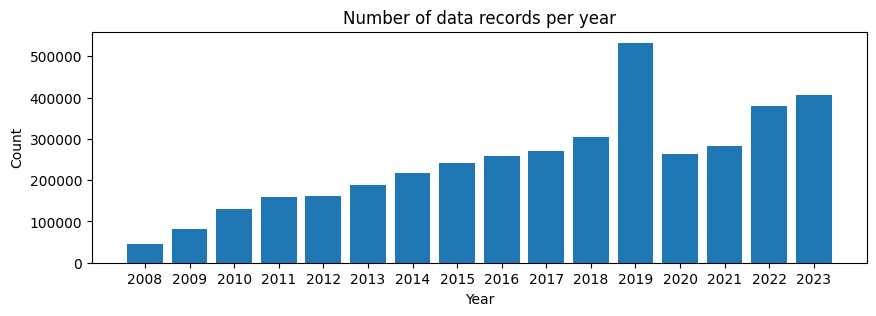

In [11]:
bar_plot(df['date'].dt.year.value_counts().sort_index(),
        (10,3),
        'Year',
        'Count',
        'Number of data records per year')

In [32]:
def histogram_plot(data, figure_size, bins_value, x_label, y_label, fig_title):

    plt.figure(figsize = figure_size)
    plt.hist(data, bins = bins_value, edgecolor='black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(fig_title)
    plt.show()

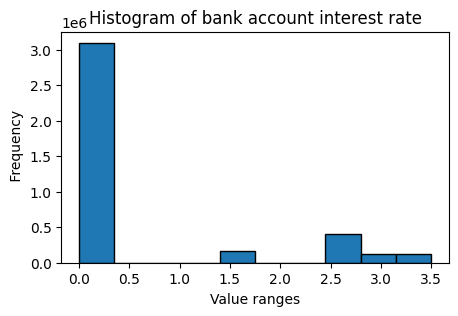

In [34]:
histogram_plot(df['interest_rate'], (5,3), 10, 'Value ranges', ' Frequency', 'Histogram of bank account interest rate')

# NEXT >>>

Recency, Frequency, and Monetary